# Natural Disasters in Europe (2000-2023)
Dataset from https://public.emdat.be/


## Introduction
In this notebook, an analysis of natural disasters in Europe from 2000 to 2023 was conducted. The goal of the analysis is to understand the impact of these events on the population and the financial losses they cause.


## Understanding the Data
The data on natural disasters includes the following variables:
- **Country:** Which countries are most affected by natural disasters.
- **Disaster Subgroup/Type/:** Analyzing different categories of natural disasters.
- **Total Affected:** Number of people affected.
- **Total Damage (USD):** Financial assessment of damages in various regions and types of disasters.


In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

In [3]:
df = pd.read_excel(r'/Users/sandra/Documents/Sql/Portfolio/public_emdat_custom_request_2024-10-02_313c4a6f-8315-43d3-9f28-6e4b863b6e4a.xlsx')

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#df.nunique()
#df

In [6]:
df1 = df.drop_duplicates()

In [7]:
df1 = df1.drop(columns=['Historic', 'Region', 'Disaster Group', 'External IDs', 'Admin Units', 'Classification Key', 'OFDA/BHA Response', 'Appeal', 'Declaration', 'Latitude', 'Longitude'])

In [8]:
df1 = df1.drop(columns=['CPI'])

In [9]:
# to datetime
df1['Entry Date'] = pd.to_datetime(df1['Entry Date'], errors='coerce')

# he want full yrs, so we need to delete 2024
df1 = df1[df1['Entry Date'].dt.year != 2024]

In [10]:
# taking yr of event out of 'DisNo.'
df1['Year'] = df1['DisNo.'].str[:4].astype(int)

# events per yr
events_per_year = df1['Year'].value_counts().sort_index()
#print(events_per_year)

## Types of Analyses

### a) Temporal Analysis 

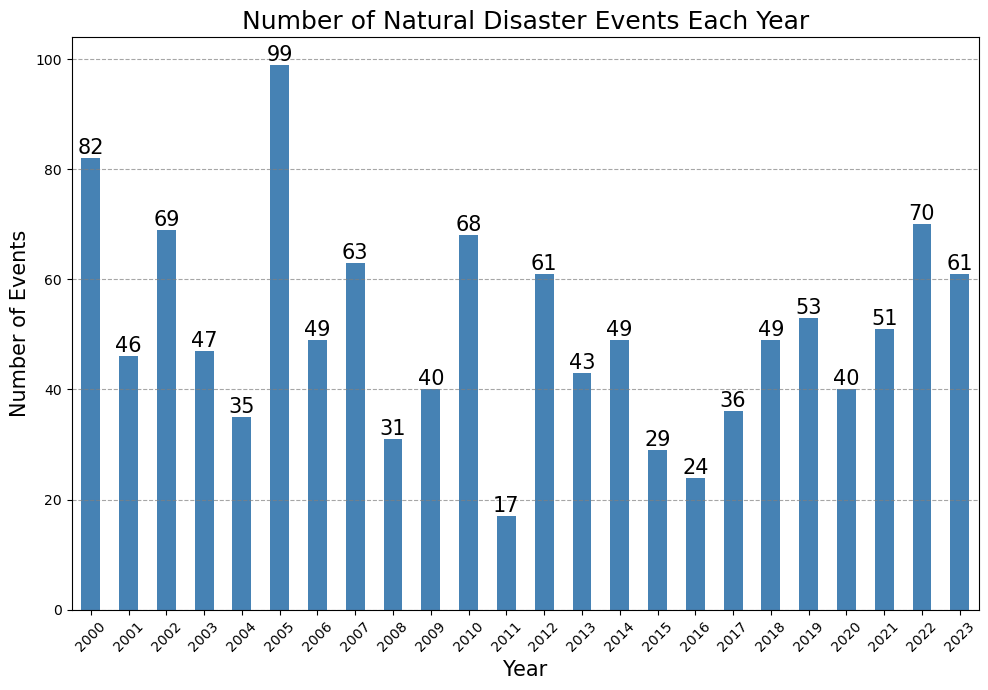

In [11]:
# Diff col
colors = plt.cm.viridis(np.linspace(0, 1, len(events_per_year)))

# Bar plot
ax = events_per_year.plot(x='Year', y='Event Count', kind='bar', color='steelblue', figsize=(10, 7))

fig = plt.gcf()
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.title('Number of Natural Disaster Events Each Year', fontsize=18, color='black')
plt.xlabel('Year', fontsize=15, color='black')
plt.ylabel('Number of Events', fontsize=15, color='black')

ax.tick_params(axis='x', labelcolor='black')  # Kolor etykiet osi X
ax.tick_params(axis='y', labelcolor='black')  # Kolor etykiet osi Y
plt.xticks(rotation=45)  # Obróć etykiety na osi X

# patches
for bar in ax.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=15, color='black')

plt.grid(axis='y', color='gray', linestyle='--', alpha=0.7)  
plt.tight_layout() 
plt.show()


### b) Event Category Analysis + %

In [22]:
# grouped by Year, Disaster Subgroup and Disaster Type + Evennt Cout
events_disaster_subgroup = df1.groupby(['Year', 'Disaster Subgroup', 'Disaster Type']).size().reset_index(name='Event Count')
print(events_disaster_subgroup)

     Year Disaster Subgroup        Disaster Type  Event Count
0    2000    Climatological              Drought            4
1    2000    Climatological             Wildfire           13
2    2000      Hydrological                Flood           33
3    2000      Hydrological  Mass movement (wet)            5
4    2000    Meteorological  Extreme temperature           12
..    ...               ...                  ...          ...
111  2023    Climatological             Wildfire            6
112  2023      Hydrological                Flood           16
113  2023      Hydrological  Mass movement (wet)            3
114  2023    Meteorological  Extreme temperature            4
115  2023    Meteorological                Storm           31

[116 rows x 4 columns]


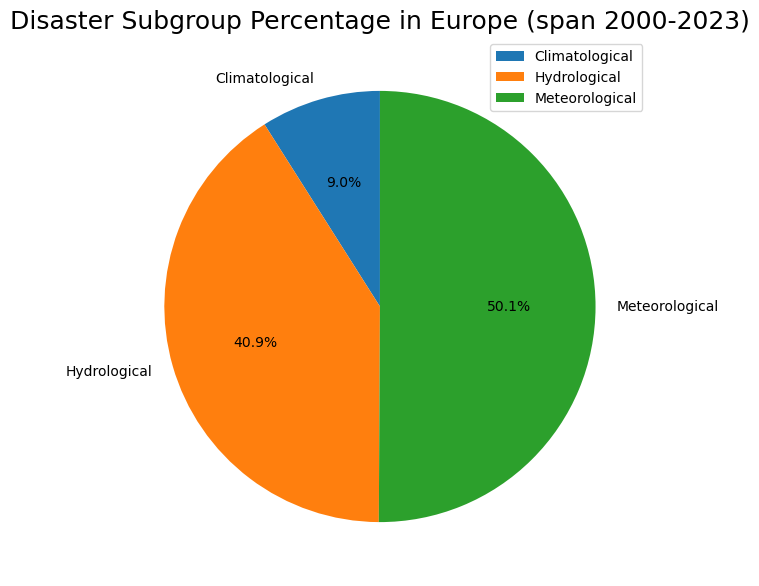

In [25]:
# Grouped by "Disaster Subgroup" and sum events count
subgroup_totals = events_disaster_subgroup.groupby('Disaster Subgroup')['Event Count'].sum().reset_index()

total_events = subgroup_totals['Event Count'].sum()

# %
subgroup_totals['Percentage'] = (subgroup_totals['Event Count'] / total_events) * 100

#print(subgroup_totals)
fig, ax = plt.subplots(figsize=(10, 7))

# white background
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Pie chart
subgroup_totals.plot.pie(
    y='Event Count',              
    labels=subgroup_totals['Disaster Subgroup'],  
    autopct='%1.1f%%',            
    ax=ax,                       
    startangle=90                 
)

# Black text color
for text in ax.texts:
    text.set_color('black')

plt.title('Disaster Subgroup Percentage in Europe (span 2000-2023)', fontsize=18, color='black')
plt.ylabel('')  
plt.show()

In [44]:
subgroup_totals_type = events_disaster_subgroup.groupby('Disaster Type')['Event Count'].sum().reset_index()
# All events
total_events_type = subgroup_totals_type['Event Count'].sum()

subgroup_totals_type['Percentage'] = (subgroup_totals_type['Event Count'] / total_events) * 100
#adding column with perc
#print(subgroup_totals_type)

                 Disaster Type  Event Count  Percentage
0                      Drought           25        2.06
1          Extreme temperature          266       21.95
2                        Flood          476       39.27
3  Glacial lake outburst flood            1        0.08
4          Mass movement (wet)           20        1.65
5                        Storm          341       28.14
6                     Wildfire           83        6.85


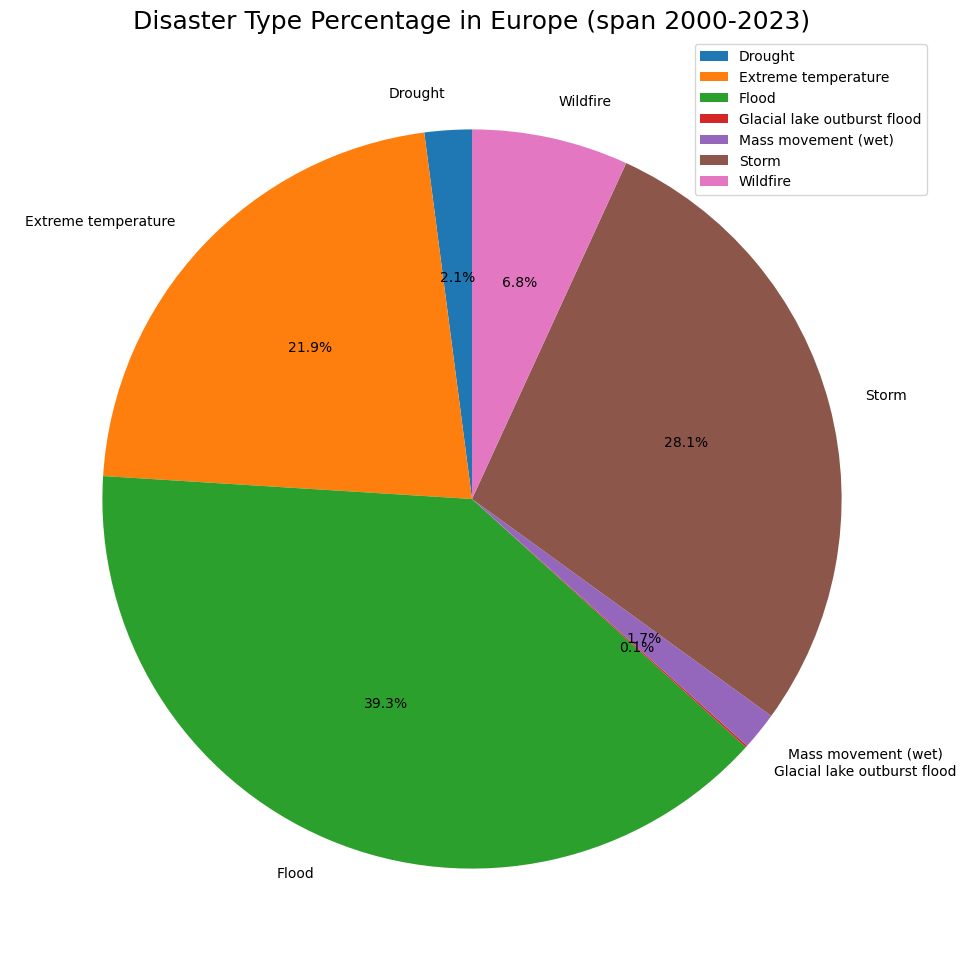

In [28]:
fig, ax = plt.subplots(figsize=(20, 12))

# white background
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Pie chart
subgroup_totals_type.plot.pie(
    y='Event Count',              
    labels=subgroup_totals_type['Disaster Type'],  
    autopct='%1.1f%%',            
    ax=ax,                       
    startangle=90                 
)

# Black text color
for text in ax.texts:
    text.set_color('black')

plt.title('Disaster Type Percentage in Europe (span 2000-2023)', fontsize=18, color='black')
plt.ylabel('')  
plt.show()


### c) Geographic Analysis

In [13]:
#Country: Which country is most affected
countries_disaster_count = df1['Country'].value_counts()
#print(countries_disaster_count)

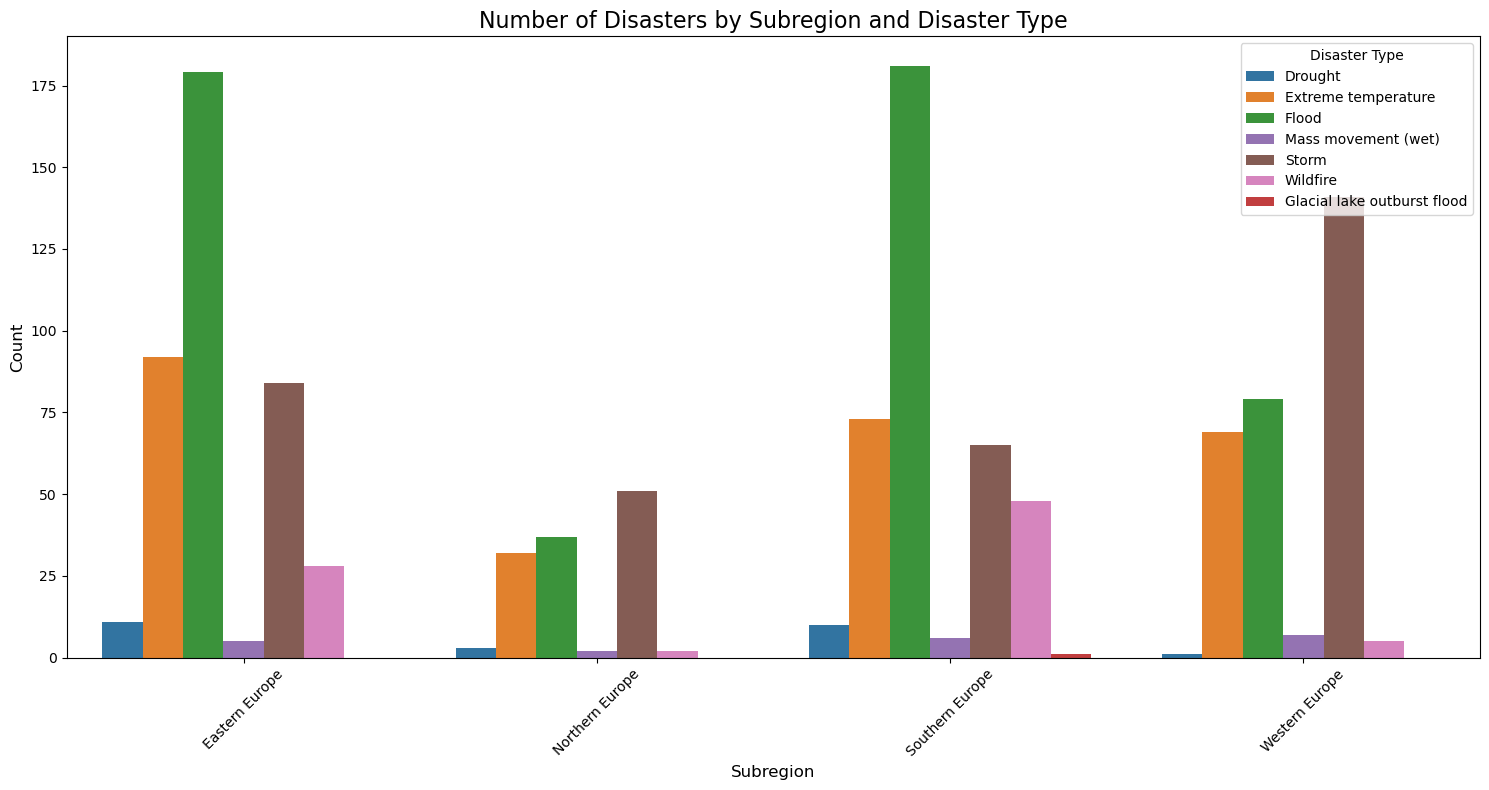

In [18]:
# Group by 'Subregion' and 'Disaster Type', then count occurrences
disaster_by_region = df1.groupby(['Subregion', 'Disaster Type']).size().reset_index(name='Count')
color_map = {
    "Drought": "#1f77b4",
    "Extreme temperature": "#ff7f0f",
    "Flood": "#2da12d",
    "Glacial lake outburst flood": "#d72829",  
    "Mass movement (wet)": "#9468bd",
    "Storm": "#8c564c",
    "Wildfire": "#e378c3"}

# Display the resulting data
#print(disaster_by_region)

# Create a bar plot for disaster counts by subregion
plt.figure(figsize=(15, 8))
sns.barplot(data=disaster_by_region, x='Subregion', y='Count', hue='Disaster Type', palette=color_map)

plt.title('Number of Disasters by Subregion and Disaster Type', fontsize=16)
plt.xlabel('Subregion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Disaster Type')
plt.tight_layout()
plt.show()


In [20]:
# GGrouped by events and coutry, countig
disaster_counts = df1.groupby(['Disaster Type', 'Country']).size().reset_index(name='Count')
#print(disaster_counts)

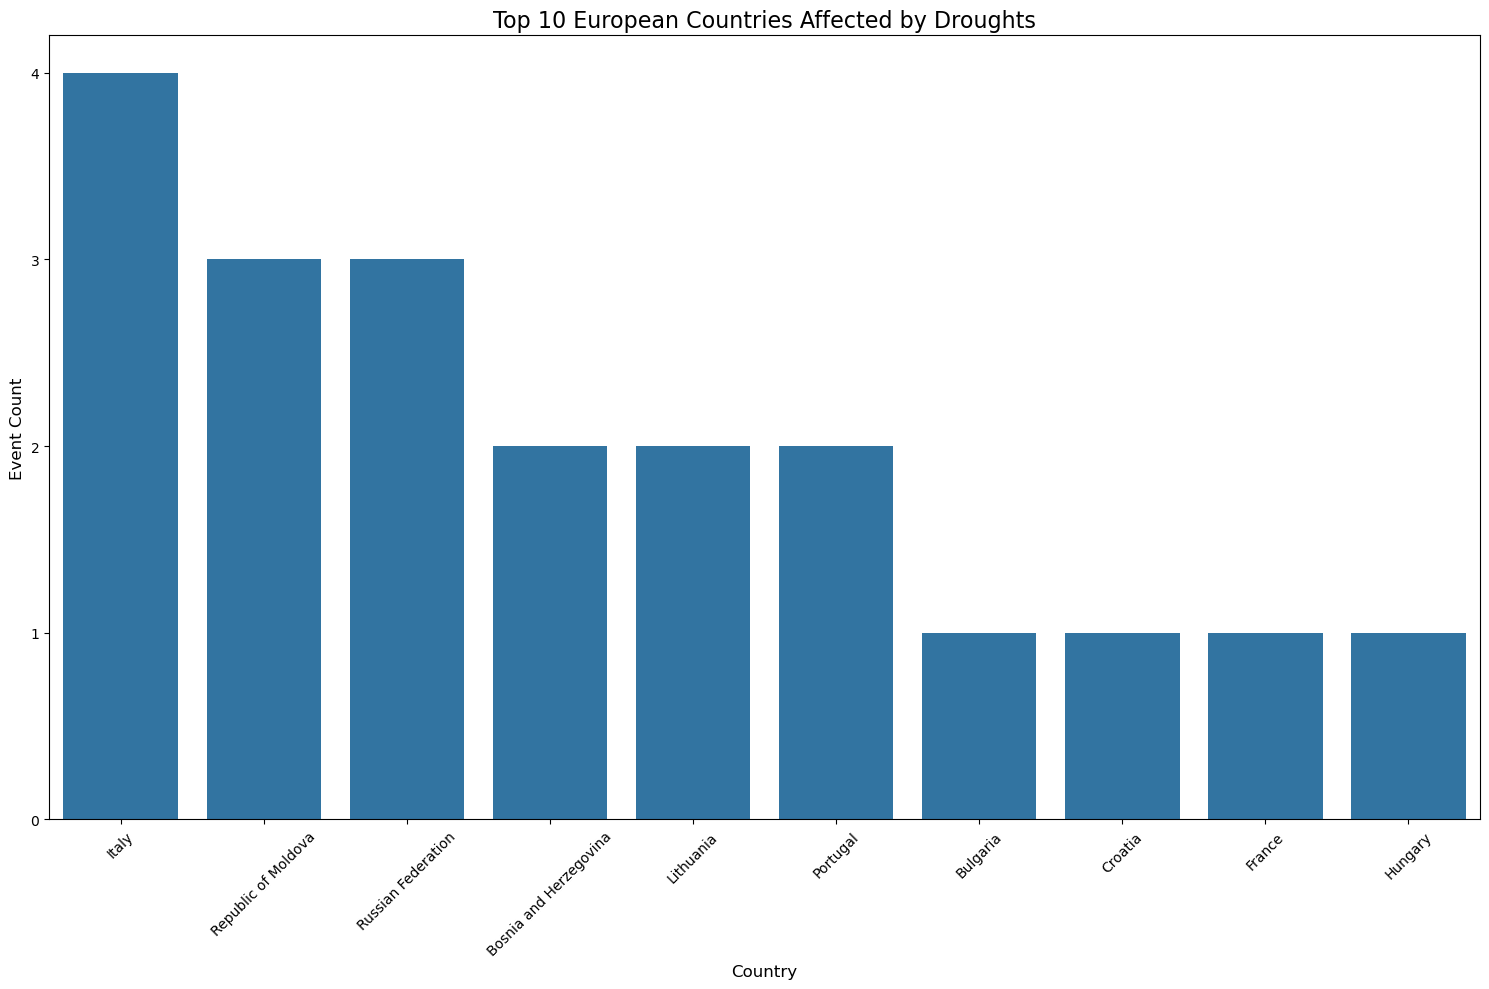

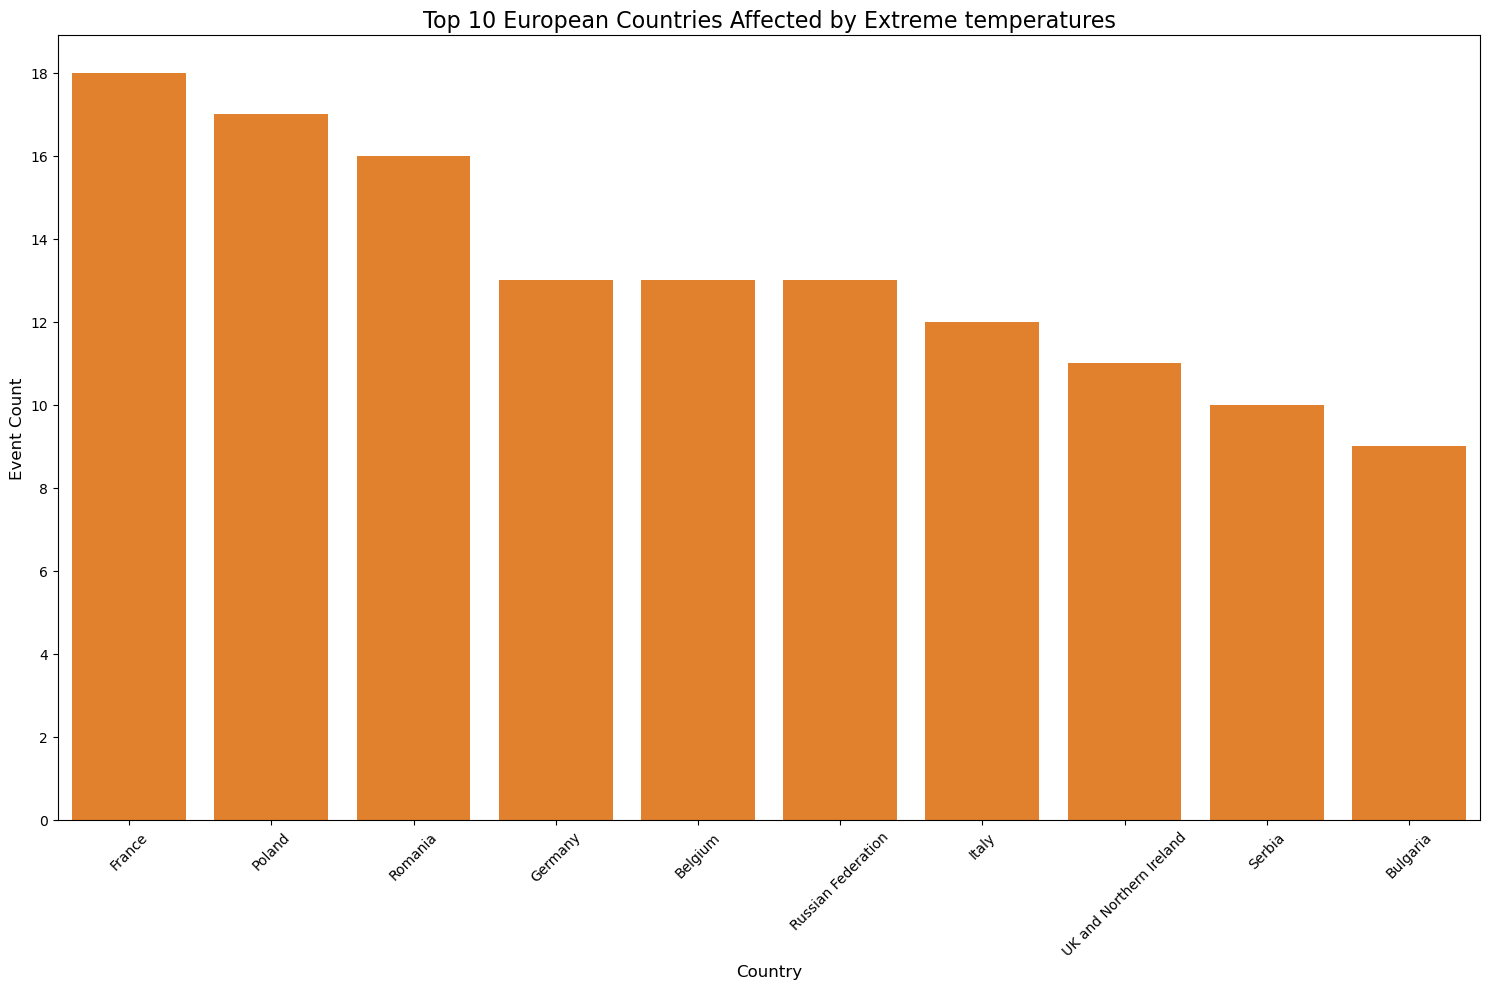

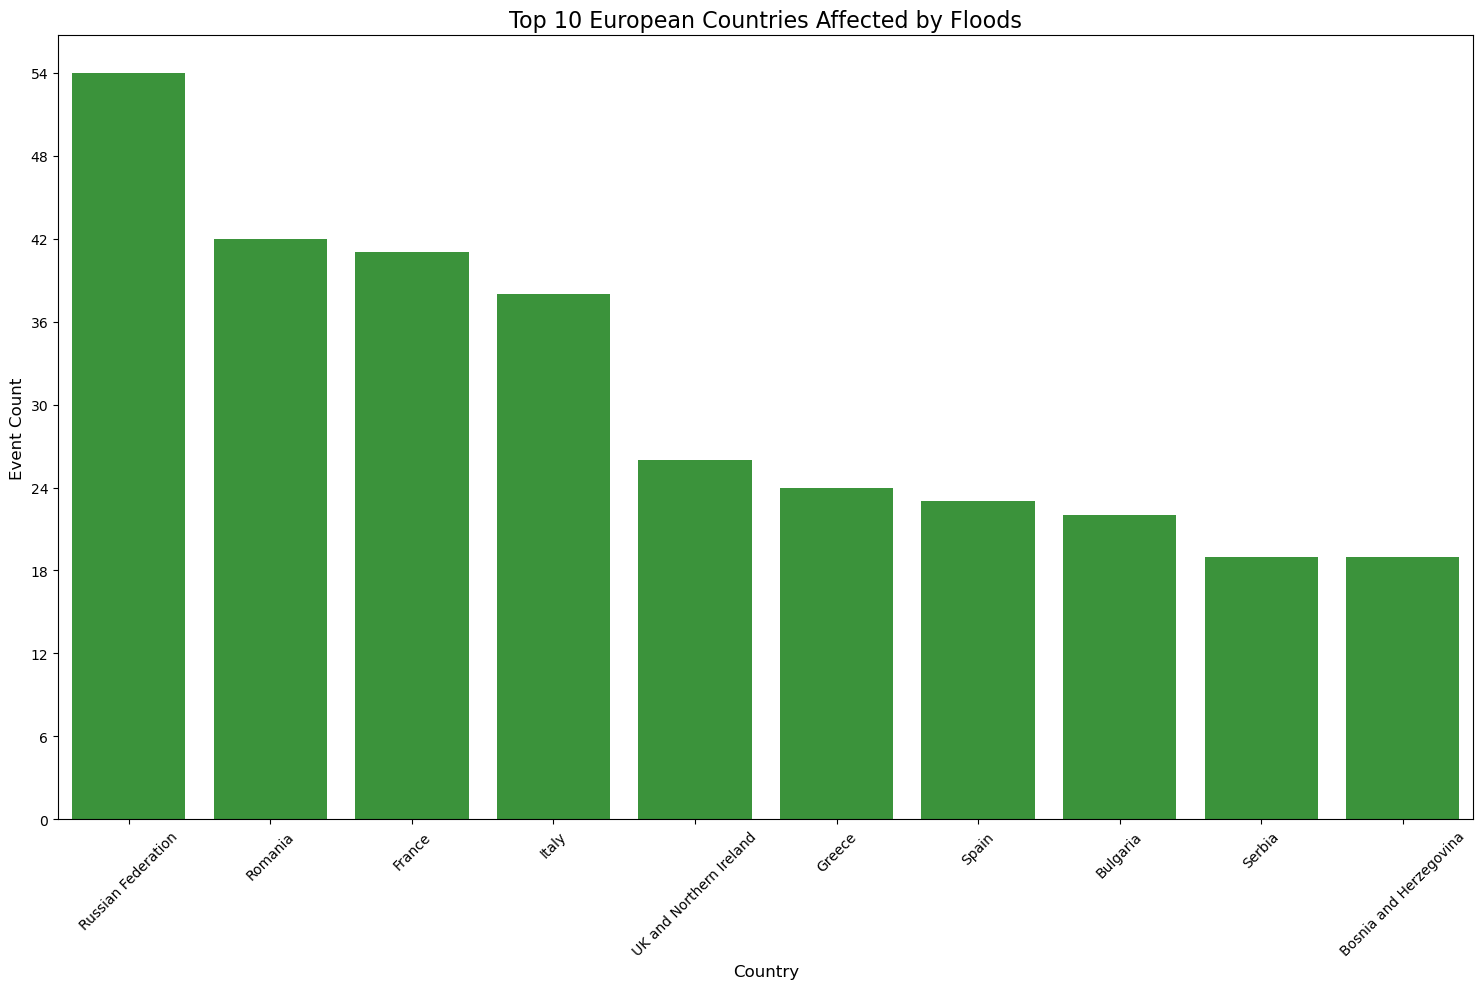

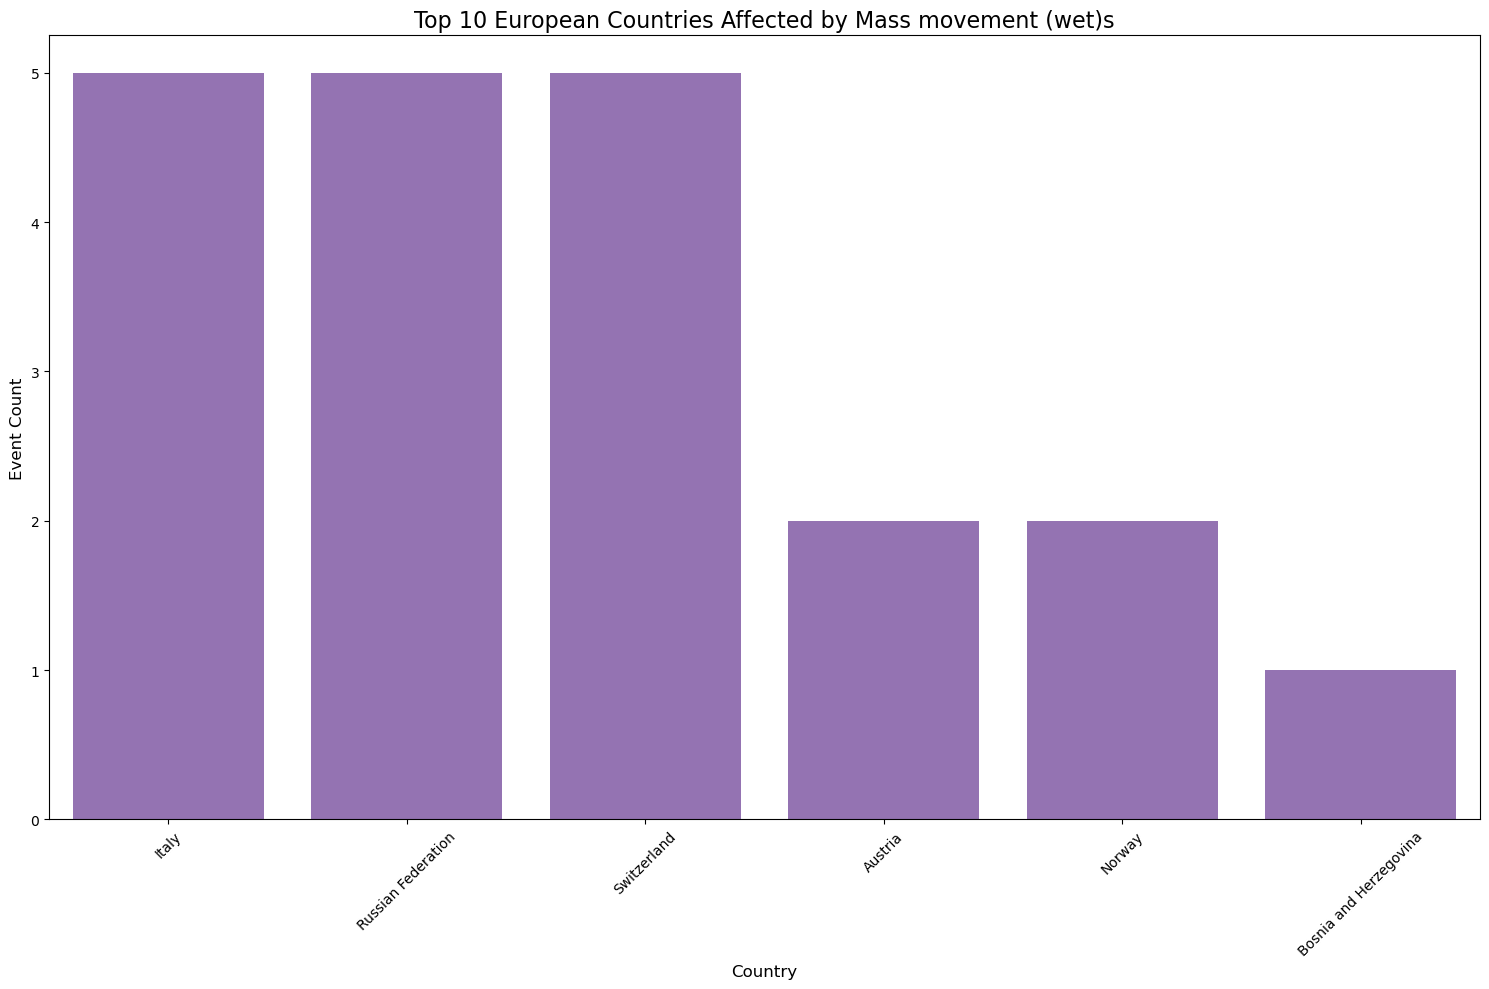

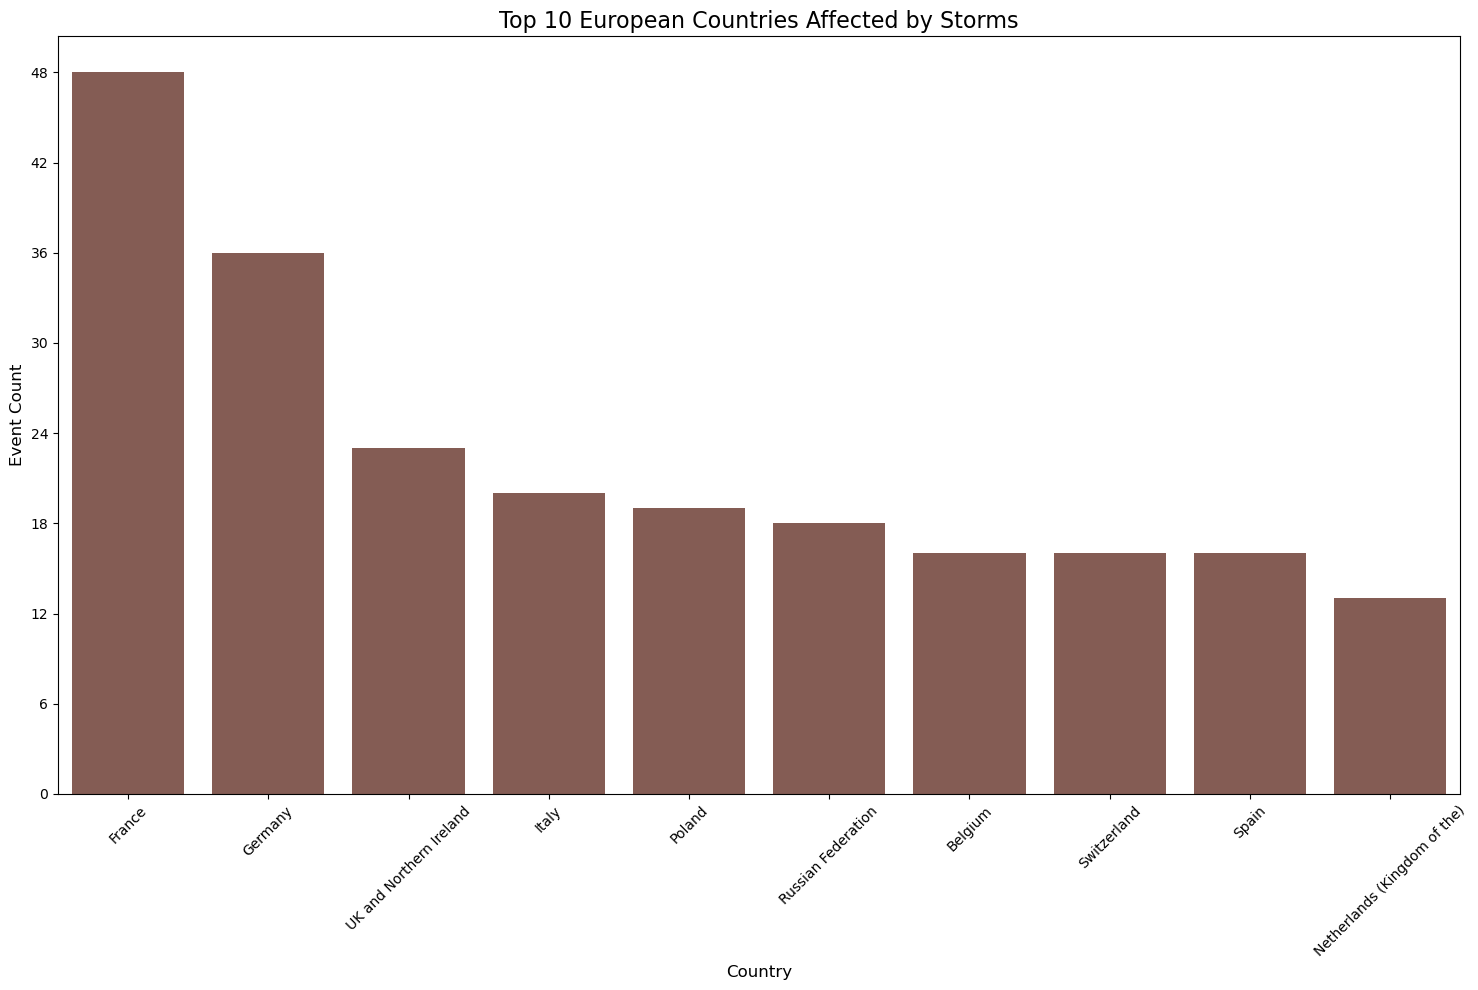

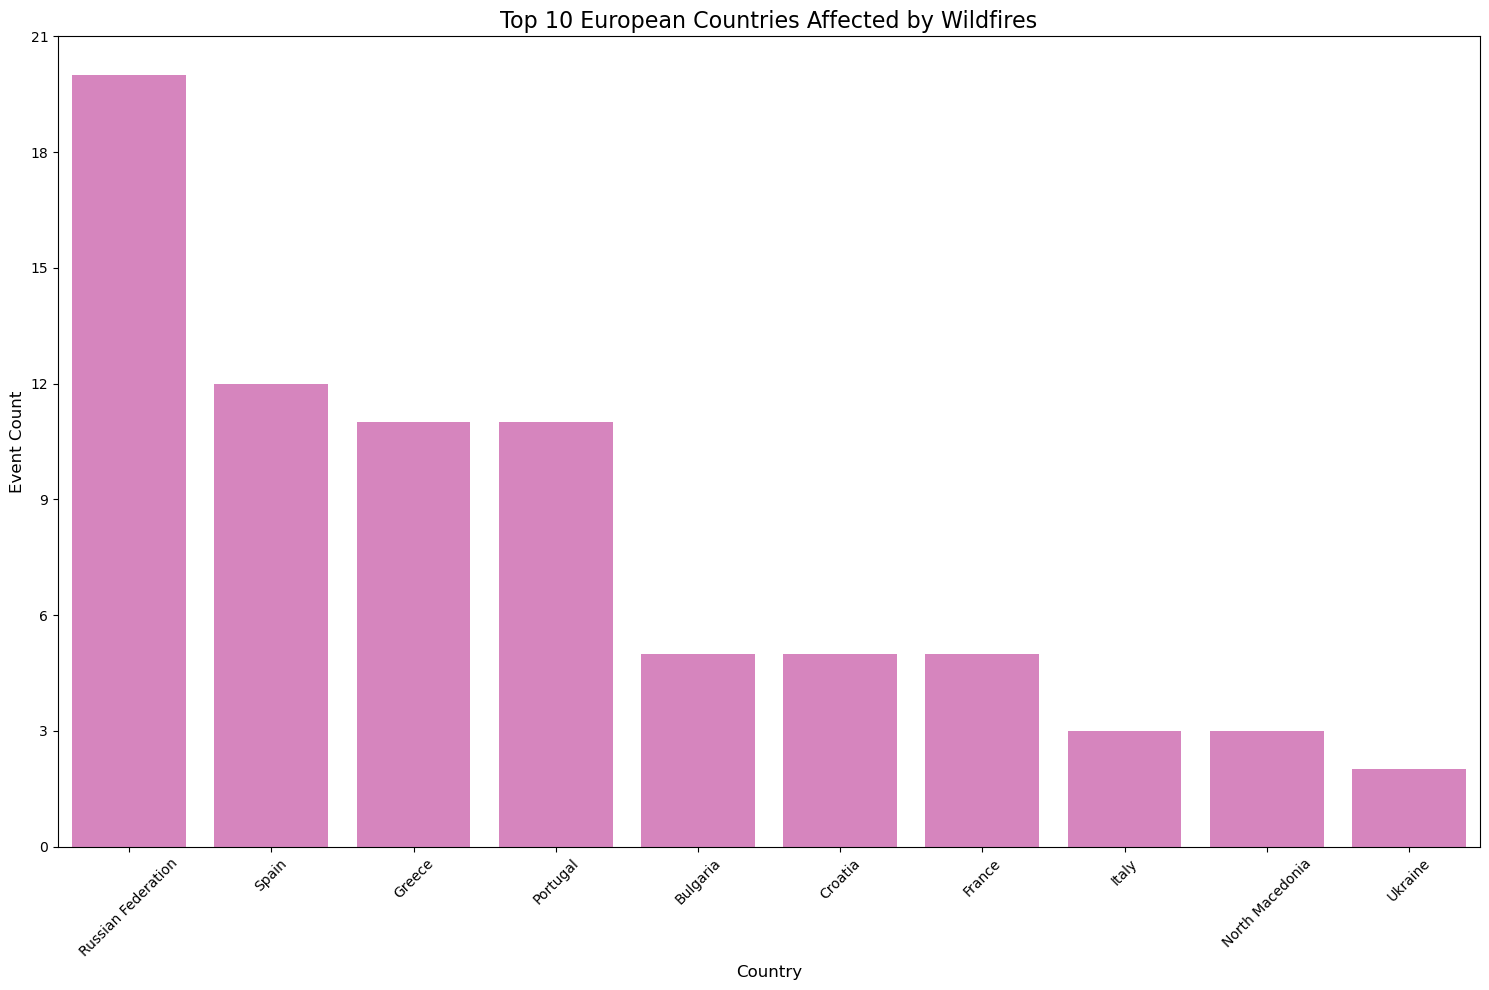

In [21]:
disaster_counts['Country'] = disaster_counts['Country'].replace(
    "United Kingdom of Great Britain and Northern Ireland", "UK and Northern Ireland"
)

# Tworzenie wykresów dla każdego typu katastrofy
for disaster_type in color_map.keys():
    if disaster_type == "Glacial lake outburst flood":
        continue  # Pomijamy ten typ katastrofy

    disaster_data = disaster_counts[disaster_counts['Disaster Type'] == disaster_type]
    
    # Sortowanie danych od największej do najmniejszej liczby wystąpień
    disaster_data = disaster_data.sort_values(by='Count', ascending=False).head(10)
    
    plt.figure(figsize=(15, 10))
    sns.barplot(data=disaster_data, x='Country', y='Count', color=color_map[disaster_type])
    
    plt.title(f'Top 10 European Countries Affected by {disaster_type}s', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Event Count', fontsize=12)
    plt.xticks(rotation=45)

        # Zapewnienie, że wartości na osi y są całkowite i wyświetlane bez ".0"
    plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x)}'))

    plt.tight_layout()
    plt.show()


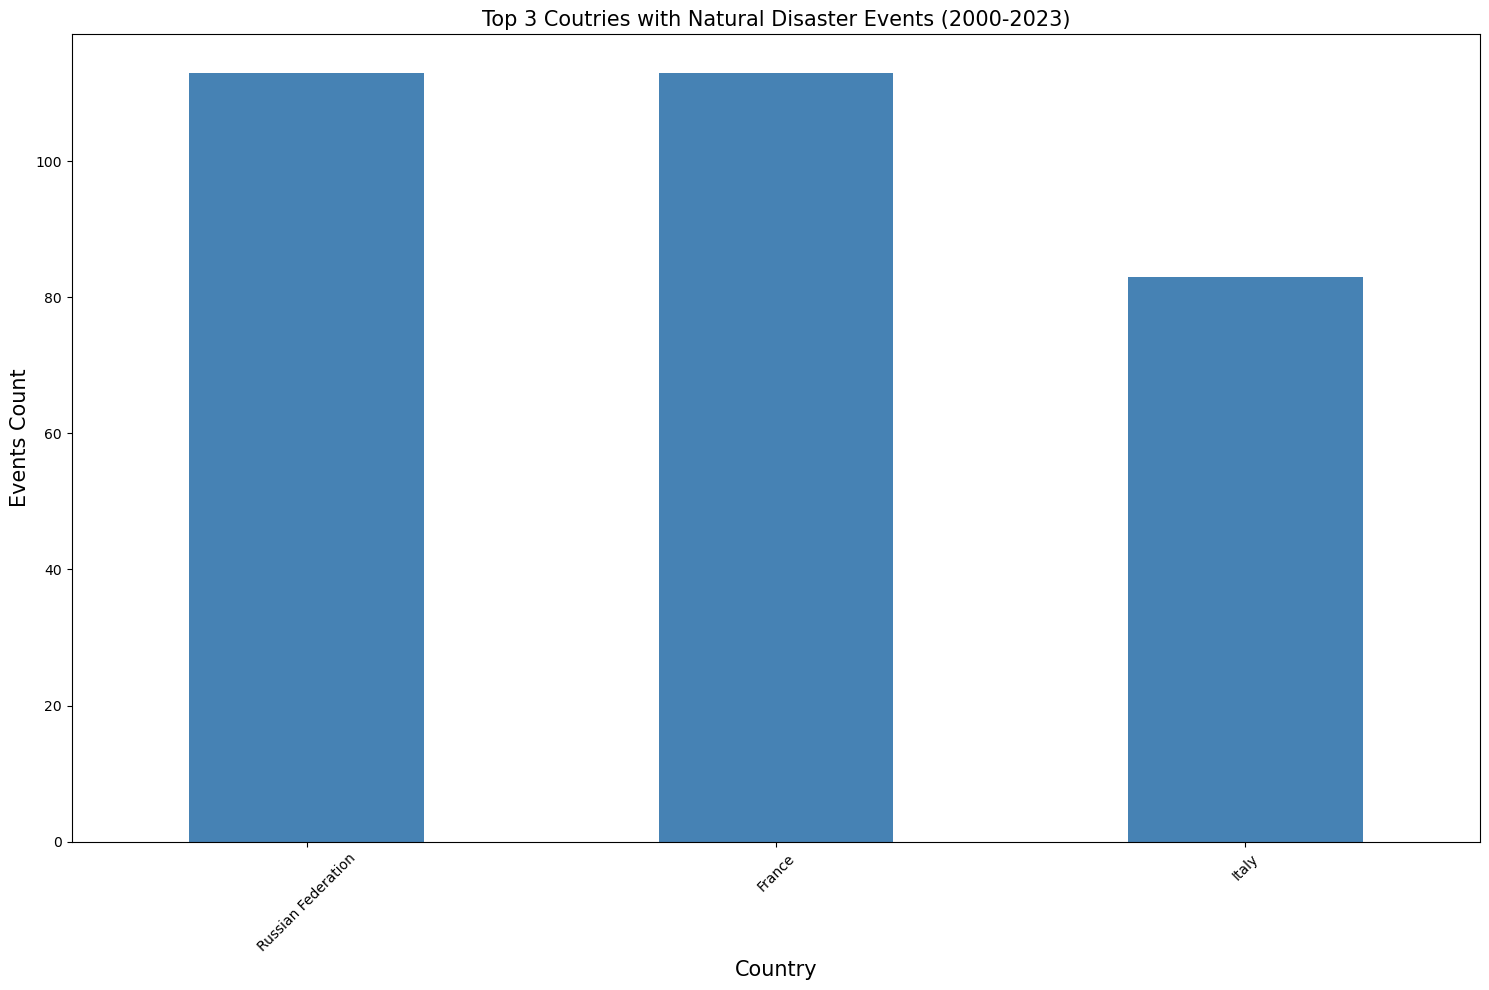

In [29]:
# Top 3 most affected countries
plt.figure(figsize=(15, 10))
countries_disaster_count.head(3).plot(kind='bar', color='steelblue')

plt.title('Top 3 Coutries with Natural Disaster Events (2000-2023)', fontsize=15)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Events Count', fontsize=15)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### d) Time Trend fo Each Event

In [32]:
# Filter for 'Glacial lake outburst flood' bc its just one value
glacial_data = events_disaster_subgroup[events_disaster_subgroup['Disaster Type'] == 'Glacial lake outburst flood']
#print(glacial_data)

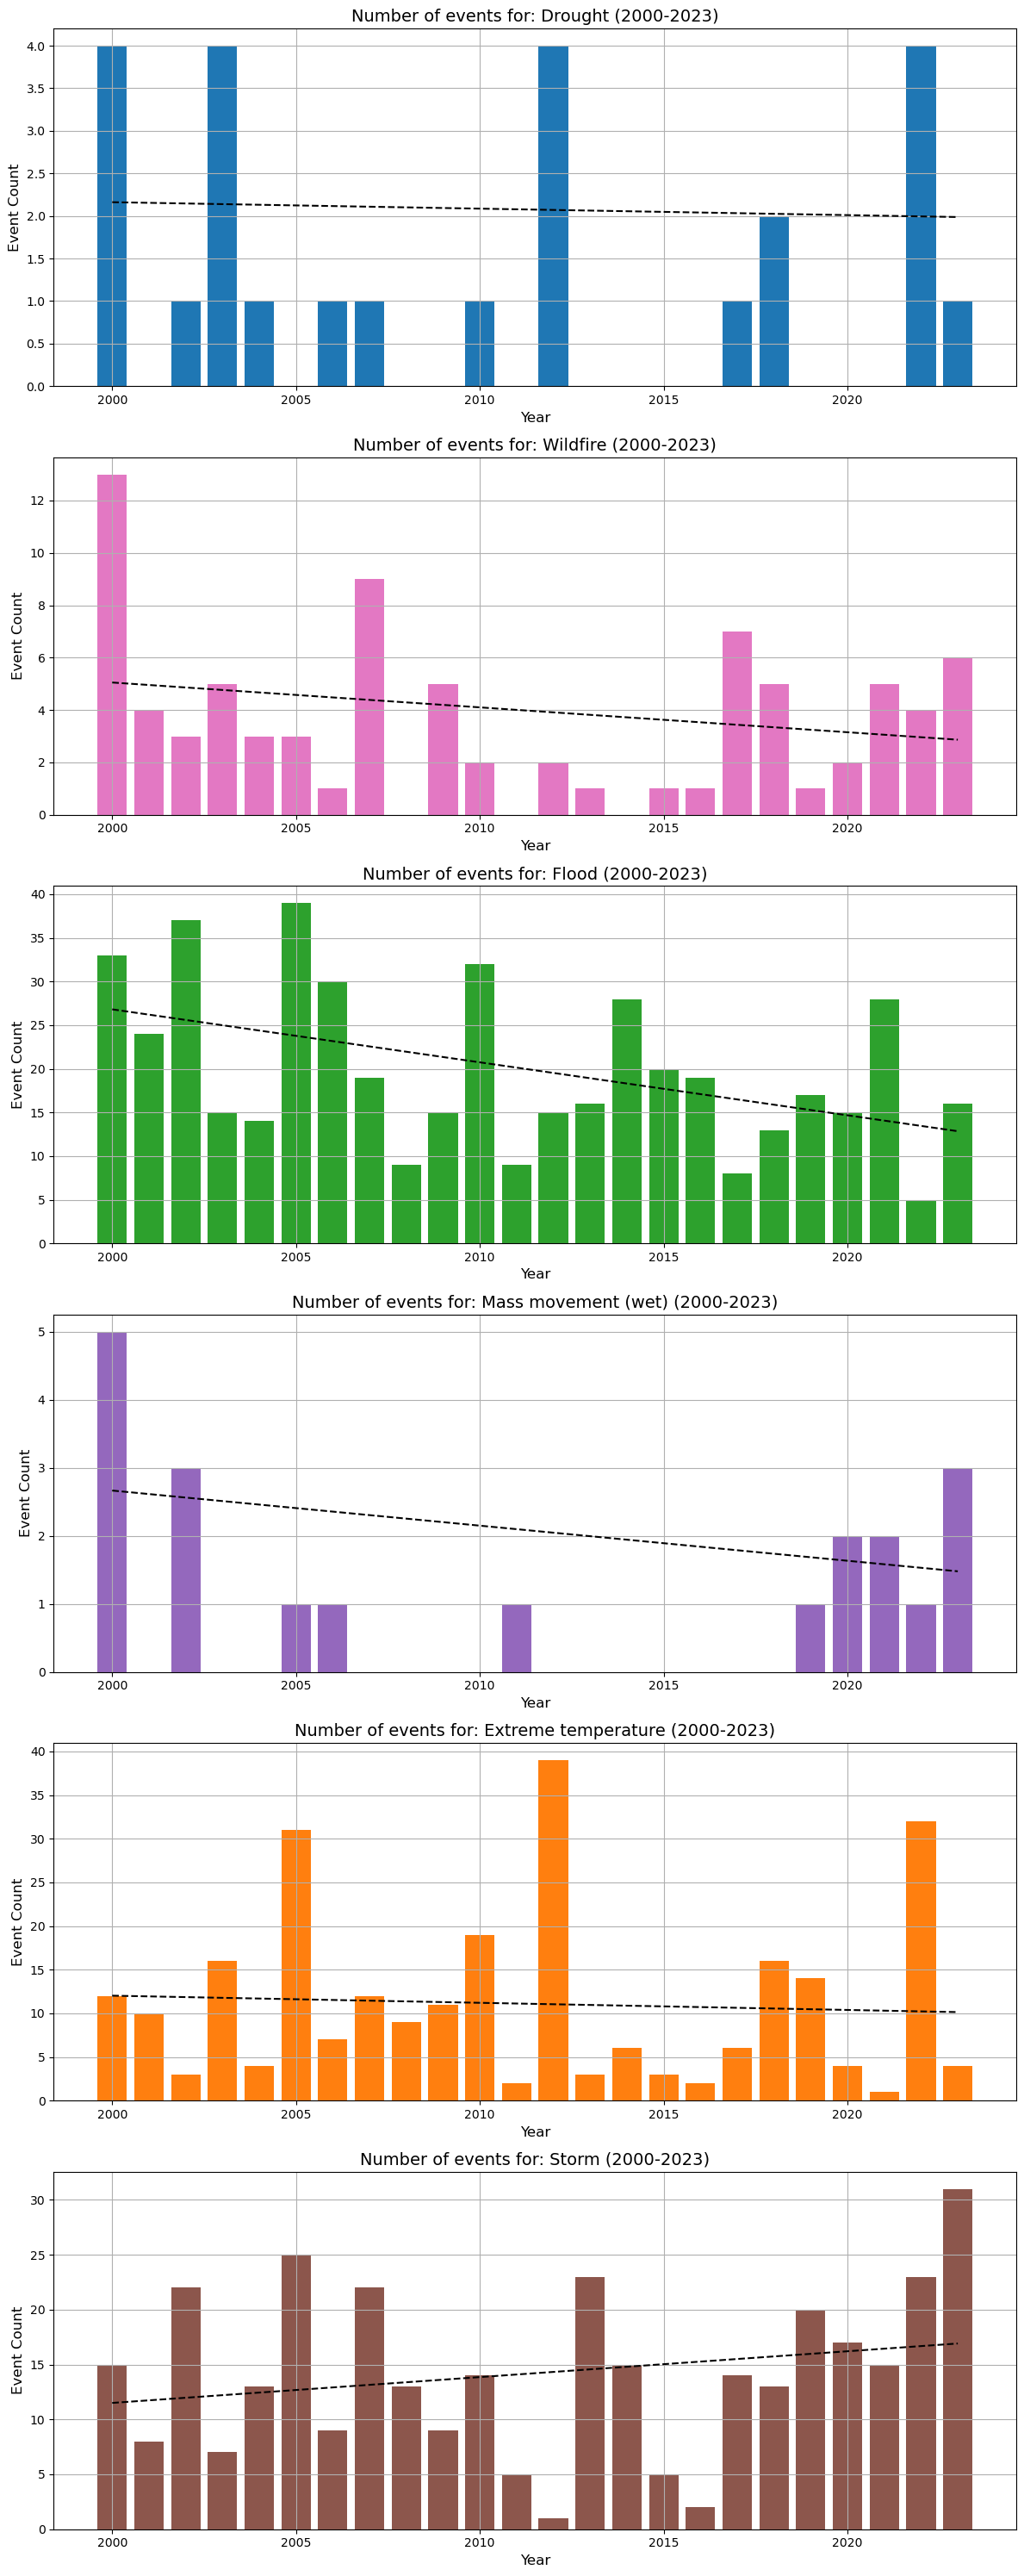

In [33]:
other_disasters = events_disaster_subgroup[events_disaster_subgroup['Disaster Type'] != 'Glacial lake outburst flood']
disaster_types = other_disasters['Disaster Type'].unique()

# Same colors for the same values as before
color_map = {
    "Drought": "#1f77b4",
    "Extreme temperature": "#ff7f0f",
    "Flood": "#2da12d",
    "Glacial lake outburst flood": "#d72829",  
    "Mass movement (wet)": "#9468bd",
    "Storm": "#8c564c",
    "Wildfire": "#e378c3"
}

fig, axs = plt.subplots(len(disaster_types), 1, figsize=(12, 5 * len(disaster_types)))

# iteration per every Disaster Type
for i, disaster_type in enumerate(disaster_types):
    data = other_disasters[other_disasters['Disaster Type'] == disaster_type]
    
    # Sum per yr
    data_per_year = data.groupby('Year')['Event Count'].sum().reset_index()
    
    # Trend line
    # Regression 1
    z = np.polyfit(data_per_year['Year'], data_per_year['Event Count'], 1)  
    p = np.poly1d(z)
    
    axs[i].plot(data_per_year['Year'], p(data_per_year['Year']), color='black', linestyle='--', label='Trend (Regresja)')

    # Event Count per yr
    axs[i].bar(data_per_year['Year'], data_per_year['Event Count'], color=color_map[disaster_type])  # Użycie odpowiednich kolorów
    axs[i].set_title(f'Number of events for: {disaster_type} (2000-2023)', fontsize=14)
    axs[i].set_xlabel('Year', fontsize=12)
    axs[i].set_ylabel('Event Count', fontsize=12)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

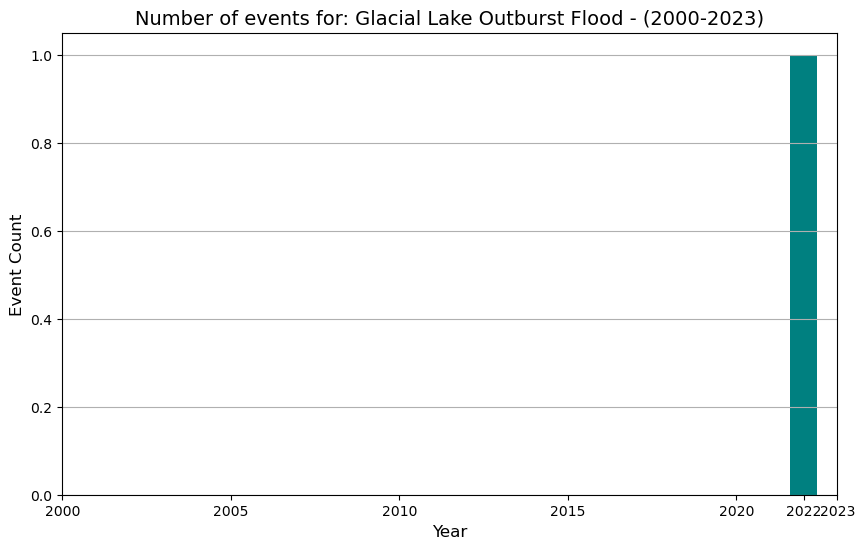

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(glacial_data['Year'], glacial_data['Event Count'], color='teal')

plt.title('Number of events for: Glacial Lake Outburst Flood - (2000-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Event Count', fontsize=12)
plt.xticks([2000, 2005, 2010, 2015, 2020, 2022, 2023]) 
plt.grid(axis='y')  

plt.show()

### e) Damage Analysis

/var/folders/1s/9396mkfx4rb7_d3s1wsv15mh0000gn/T/ipykernel_44582/630359611.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=damage_summary, x="Total Damage, Adjusted ('000 US$)", y='Disaster Type', palette=color_map)


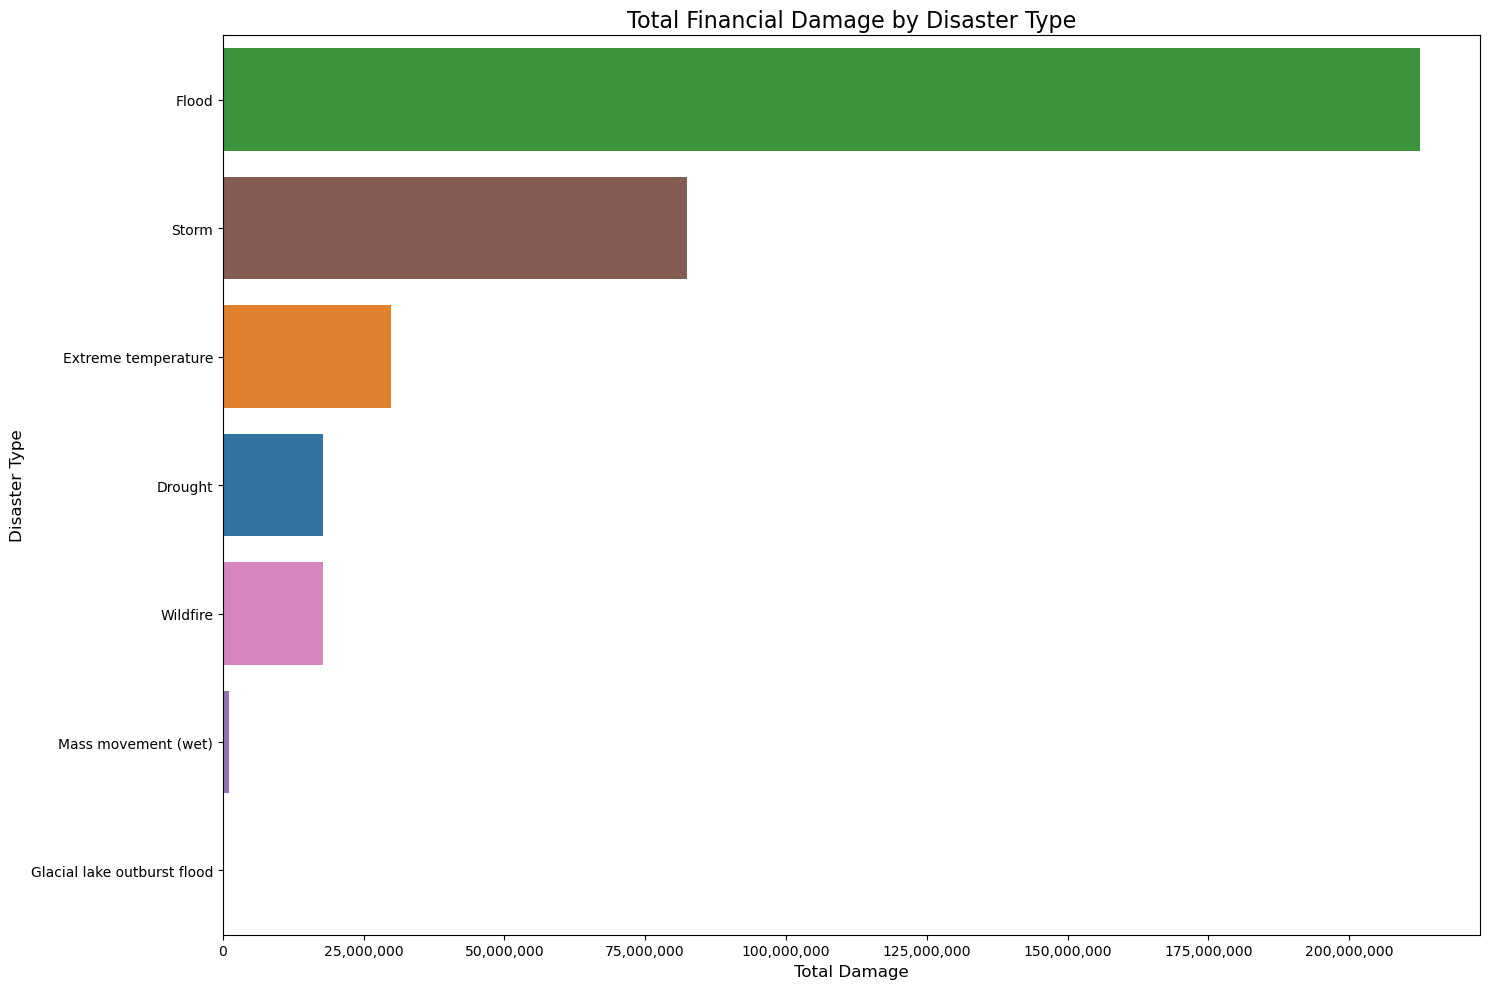

In [35]:
# Summing up total damage for each disaster type
damage_summary = df1.groupby('Disaster Type')["Total Damage, Adjusted ('000 US$)"].sum().reset_index()

plt.figure(figsize=(15, 10))

# Sorting the damage summary by total damage in descending order
damage_summary = damage_summary.sort_values(by="Total Damage, Adjusted ('000 US$)", ascending=False)

# Creating the bar plot using the color map
sns.barplot(data=damage_summary, x="Total Damage, Adjusted ('000 US$)", y='Disaster Type', palette=color_map)

# Setting the title and labels
plt.title("Total Financial Damage by Disaster Type", fontsize=16)
plt.xlabel("Total Damage", fontsize=12)
plt.ylabel("Disaster Type", fontsize=12)

# Ensuring the numbers are formatted properly
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


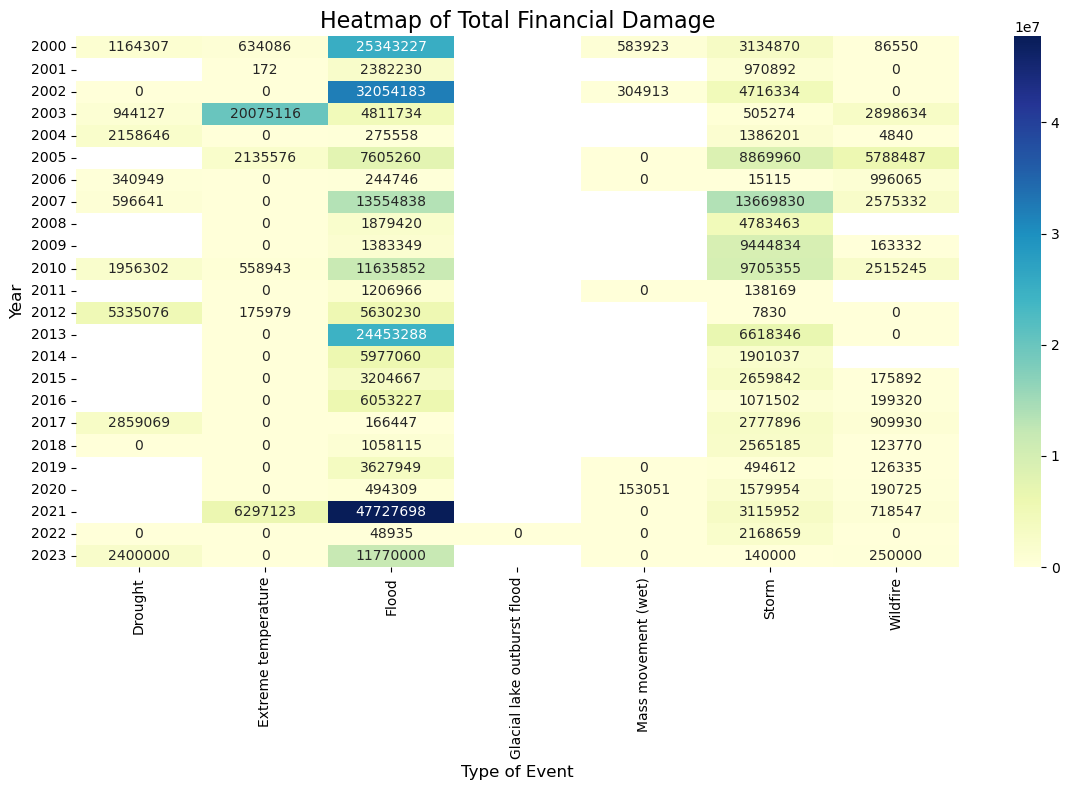

In [36]:
heatmap_data = df1.pivot_table(values="Total Damage, Adjusted ('000 US$)", index='Year', columns='Disaster Type', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap of Total Financial Damage', fontsize=16)
plt.xlabel('Type of Event', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.tight_layout()
plt.show()


In [63]:
damage_summary_peop = df1.groupby('Disaster Type')["Total Affected"].sum().reset_index()
#print(damage_summary_peop)

## Key Findings

#### Most Common Disasters

In [48]:
# Finding the most common disaster type based on the 'Percentage' column
most_popular_disaster = subgroup_totals_type.sort_values(by='Percentage', ascending=False).iloc[0]
# Displaying the result
print(f"The most common disaster type is: {most_popular_disaster['Disaster Type']}, which accounts for {most_popular_disaster['Percentage']}% of all disasters.")


The most common disaster type is: Flood, which accounts for 39.273927392739274% of all disasters.


#### Countries with the most Events

In [55]:
countries_disaster_count_a = countries_disaster_count.sort_values(ascending=False)
max_country = countries_disaster_count_a.idxmax()  # Zwraca nazwę kraju z maksymalną liczbą
max_count = countries_disaster_count_a.max()       # Zwraca maksymalną liczbę

print(f"Country with the most disasters: {max_country} ({max_count})")


Country with the most disasters: Russian Federation (113)


#### Total Affected People by the Disaster Type

In [64]:
damage_summary_peop.sort_values(by = 'Total Affected', ascending=False)

,Disaster Type,Total Affected
2,Flood,8884627.00
5,Storm,4625540.00
6,Wildfire,1398811.00
0,Drought,1304769.00
1,Extreme temperature,712024.00
4,Mass movement (wet),7432.00
3,Glacial lake outburst flood,0.00


## Recommendations

- Strengthen early warning systems in regions most affected by floods.
- Increase investment in infrastructure protections in countries with the highest financial losses due to natural disasters.
- Closely look especially on storms which have increased trend in time
- Invest in Research and Development: Support research initiatives that focus on understanding the impacts of climate change on natural disasters. Investing in new technologies and strategies to mitigate these impacts can yield long-term benefits.



### Summary
##### The analysis of natural disasters in Europe from 2000 to 2023 reveals significant trends and patterns that underline the increasing frequency and financial impact of these events. Key observations include:

- Rising Frequency of Disasters: There has been a noticeable increase in the number of natural disasters reported, particularly in specific categories such as storms and floods. This trend suggests a potential correlation with climate change and underscores the urgency for proactive measures.

- Geographical Disparities: Certain countries are disproportionately affected, with higher incidences of events leading to greater total affected populations and financial losses. For instance, countries like Russsia and Moldova have recorded the highest numbers of total affected individuals, highlighting the need for tailored disaster response strategies.

- Financial Impacts: The data indicates that disasters such as Floods have resulted in substantial economic losses, with total damages reaching alarming figures in certain regions. This trend emphasizes the necessity for enhanced financial planning and infrastructure investment to mitigate future risks.






